<a href="https://colab.research.google.com/github/Minh-A/Pytorch_DeepLearning/blob/main/Pytorch_book_0108.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1월 8일: 뉴스기사분류, 퍼셉트론

In [4]:
!pip install konlpy

     |████████████████████████████████| 19.4MB 1.2MB/s 
     |████████████████████████████████| 92kB 12.9MB/s 
     |████████████████████████████████| 460kB 57.8MB/s 
  Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3
  Found existing installation: tweepy 3.6.0
    Uninstalling tweepy-3.6.0:
      Successfully uninstalled tweepy-3.6.0


In [5]:
import os

import re

from sklearn import datasets, model_selection
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

from konlpy.tag import Hannanum
from konlpy.tag import Kkma

import pandas as pd
import numpy as np

In [17]:
dir_p = '/content/drive/MyDrive/Colab Notebooks/pytorch 책/file/news/'
target_d = 'HKIB-20000'
cat_d = ['health','economy','science','education','culture','society','industry','leisure','politics']
cat_prefixes = ['건강','경제','과학','교육','문화','사회','산업','여가','정치']

files = os.listdir(dir_p + target_d)

# 5분할된 파일을 각각처리
for file in files:

  # 데이터가 담긴 파일만 처리
  if not file.endswith('.txt'):
    continue

  # 각 테스트 파일을 처리
  with open(dir_p + target_d + '/' + file) as currfile:
    doc_cnt = 0
    docs = []
    curr_doc = None
    
    # 기사 단위로 분할해서 리스트를 생성
    for curr_line in currfile:
      if curr_line.startswith('@DOCUMENT'):
        if curr_doc is not None:
          docs.append(curr_doc)
        curr_doc = curr_line
        doc_cnt = doc_cnt + 1
        continue
      curr_doc = curr_doc + curr_line

    # 각 기사를 대주제별로 분류해서 기사별 파일로 정리
    for doc in docs:
      doc_lines = doc.split('\n')
      doc_no = doc_lines[1][9:]

      # 주제 추출
      doc_cat03 = ''
      for line in doc_lines[:10]:
        if line.startswith("#CAT'03:"):
          doc_cat03 = line[10:]
          break

      # 추출한 주제별로 디렉터리 정리
      for cat_prefix in cat_prefixes:
        if doc_cat03.startswith(cat_prefix):
          dir_index = cat_prefixes.index(cat_prefix)
          break

      # 문서 정보를 제거하고 기사 본문만 남기기
      filtered_lines = []
      for line in doc_lines:
        if not (line.startswith('#') or line.startswith('@')):
          filtered_lines.append(line)

      # 주제별 디렉터리에 기사를 파일로 쓰기
      filename = 'hkib-' + doc_no + '.txt'
      filepath = dir_p + target_d + '/' + cat_d[dir_index]

      if not os.path.exists(filepath):
        os.makedirs(filepath)
      f = open(filepath + '/' + filename, 'w')
      f.write('\n'.join(filtered_lines))
      f.close()

In [23]:
# 대상이 되는 주제 폴더 선택 (경제, 사회)
dirs = ['education', 'health']

# 각 폴더의 파일을 하나씩 읽어 들임
for i,d in enumerate(dirs):
  files = os.listdir(dir_p + target_d + '/' + d)

  # 파일 목록 읽어오기
  for file in files:
    # 각 파일을 읽어 들이기
    f = open(dir_p + target_d + '/' + d + '/' + file, 'r', encoding= 'utf-8')
    raw = f.read()

    # 정규표현식을 사용해 불필요한 문자열을 제거한 다음 파일 내용을 출력
    reg_raw = re.sub(r'[0-9a-zA-Z]','',raw)
    reg_raw = re.sub(r'[-\'@#:/<>!-"*\(\)]','',raw)
    reg_raw = re.sub(r'[ ]+', ' ',reg_raw)
    reg_raw = reg_raw.replace('\n',' ')

    # 파일 닫기
    f.close()

In [25]:
# 대상이 되는 주제 폴더 선택 (교육, 건강)
dirs = ['education', 'health']

# 기사에 출현하는 단어와 레이블을 저장할 리스트를 생성
# 설명변수
x_ls = []
# 목적변수
y_ls = []
tmp1 = []
tmp2 = ''

# 형태소 분석기 객체 생성
tokenizer = Kkma()

# 각 폴더의 파일을 하나씩 읽어 들이며, 전처리 후 리스트에 저장
for i,d in enumerate(dirs):

  # 파일 목록 읽어오기
  files = os.listdir(dir_p + target_d + '/' + d)

  for file in files:
    # 각 파일을 읽어 들어기
    f = open(dir_p + target_d + '/' + d + '/' + file, 'r', encoding='utf-8')
    raw = f.read()

    # 정규표현식을 사용해 불필요한 문자열을 제거한 다음 파일 내용을 출력
    reg_raw = re.sub(r'[-\'@#:/<>!-"*\(\)]','',raw)
    reg_raw = re.sub(r'[ ]+', ' ',reg_raw)
    reg_raw = reg_raw.replace('\n',' ')

    # 형태소 분석을 거쳐 명사만 추출한 리스트를 생성
    tokens = tokenizer.nouns(reg_raw)

    for token in tokens:
      tmp1.append(token)

    tmp2 = ' '.join(tmp1)
    x_ls.append(tmp2)
    tmp1 = []

    # 기사 주제 레이블을 리스트에 저장
    y_ls.append(i)

    # 파일 닫기
    f.close()

In [26]:
# 데이터프레임으로 변환해서 설명변수를 화면에 출력
pd.DataFrame(x_ls)

,0
0,서울시 서울시교육청 교육청 18 18일 일 지금 실시 영동 현대 청담 신일 잠실 잠...
1,10 10대 대 청소년 10명중 명 중 4 4명 장래 성장 공무원 언론 방송 방송분...
2,언어 언어교육 교육 12 환갑 은 이제 언어학자 만이 이론 지식층 얘기 외국어 12...
3,학교 학교법인 법인 중동 중동학원 학원 삼성 삼성그룹 그룹 인수 관선 관선이사회이사...
4,고궁 공원 놀이터 어디 어린이 축제 일색 어린이날 엔 날씨 전국 3 3백만명 백만 ...
...,...
996,모든 처치 피부 피부절개 절개 후 시행 진 관절 관절질환 질환 수술 수술치료 치료 ...
997,얼굴 팔 손 다리 무기력 일시적 앞 보이 지 한쪽 눈 양쪽 말 사람 의 음식 원인 ...
998,아산 아산재단 재단 서울 서울중앙병원 중앙 병원 송 송명근박사팀 명근 박사 팀 국내...
999,시대 변화 우리 우리나라 나라 주요 사인 마찬가지 경희대 예방 예방의학교실 의학 교...


In [27]:
# 첫 번째 기사로부터 추출한 단어를 출력
print(x_ls[0])

서울시 서울시교육청 교육청 18 18일 일 지금 실시 영동 현대 청담 신일 잠실 잠실여고 여고 등 5 5개교 개 교 특별 특별감사 감사 중간 중간발표 발표 일부 학교 채점 잘못 생활 생활기록부 기록 부 관리 관리상 상 문제점 적발 시 시교육청 결과 경우 92 92학년도 학년도 2 2학기말 학기 말 3 3학 학 년 국어 국어과목 과목 15 15명 명 수학 수학과목 1 1명 93 93학년도 1학기말 3학년 학년 영어 국사 문학 19 19명 오답 정답 처리 학생 내신 내신성적 성적 불 불이익 이익 9193 9193학년도 2학기 체육 미술 교련 교련과목 22 22명 의 실기 실기점수 점수 정정 날인 0 0점 점 37 37점 기재 5단계 단계 평가 가가 양 석차 영향 이 생활기록부에 부에 봉사 봉사활동 활동 가산점 부여 반장 부반장 학급 총무 회계 서기 확대 적용 이 대부분 카드 작성 답안지 정답수정시 수정 수정액 스티커 사용 연필 표 기 하면 하면청담 시험 시험감독교사 감독 교사 등 답안 관리상의 상의 소홀 소홀점 점 편 상문고 문고 성적조작 조작 관련 볼링 볼링부 김 김모군17 모군 17 지난해 1학년성적 일괄적 미 이상 상향 상향조작 추가 종료 12 12명 2개반 반 표본 추출 여부 확인 모두 62 62개 과목중 중 49 49개 합산 합산과정 과정 착오 고의 고의성 성 발견


In [28]:
# 목적변수를 화면에 출력
print(y_ls)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [29]:
# 설명변수와 목적변수를 Numpy 배열로 변환
x_array = np.array(x_ls)
y_array = np.array(y_ls)

# 단어 출현 횟수를 계수
cntvec = CountVectorizer()
x_cntvecs = cntvec.fit_transform(x_array)
x_cntarray = x_cntvecs.toarray()

# 데이터프레임으로 단어 출현 횟수 출력
pd.DataFrame(x_cntarray)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,38162,38163,38164,38165,38166,38167,38168,38169,38170,38171,38172,38173,38174,38175,38176,38177,38178,38179,38180,38181,38182,38183,38184,38185,38186,38187,38188,38189,38190,38191,38192,38193,38194,38195,38196,38197,38198,38199,38200,38201
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
997,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
998,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
999,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [30]:
# 단어와 단어의 인덱스 표시
for k,v in sorted(cntvec.vocabulary_.items(), key=lambda x:x[1]):
  print(k,v)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
취피구 33202
취하 33203
취학 33204
취학률 33205
취학연령 33206
취학전 33207
취학직전 33208
취한 33209
취합 33210
취항 33211
취항국과 33212
취향 33213
측간 33214
측근 33215
측도 33216
측면 33217
측면도 33218
측은 33219
측이 33220
측정 33221
측정기 33222
측정기관 33223
측정기준량생선 33224
측정등 33225
측정법 33226
측정연세대 33227
측정장비 33228
측통 33229
치과 33230
치과기공 33231
치과기공사 33232
치과대학 33233
치과면허시험 33234
치과병원 33235
치과병의원 33236
치과보험 33237
치과분야 33238
치과시술 33239
치과영역 33240
치과용 33241
치과용의자등 33242
치과위생사 33243
치과은 33244
치과의 33245
치과의료단 33246
치과의사 33247
치과의사단체 33248
치과의사협의 33249
치과의사협회 33250
치과의사협회등 33251
치과의사회 33252
치과의원 33253
치과재료 33254
치과전문의 33255
치과전문의제도 33256
치과치료 33257
치과환자 33258
치기 33259
치대에 33260
치대중 33261
치됐 33262
치러졌 33263
치료 33264
치료결과 33265
치료과정 33266
치료기 33267
치료기구 33268
치료등에 33269
치료방법 33270
치료방사선과등 33271
치료법 33272
치료분야 33273
치료비 33274
치료사 33275
치료성과 33276
치료세포 33277
치료시간 33278
치료실 33279
치료약 33280
치료약품 33281
치료연구소장 33282
치료자 33283
치료장치 33284
치료전 33285
치료제 33286
치료중 33287
치료중단 33288
치료중심 33289
치료중심병원 33290
치료중이 33291


In [75]:
# 단어의 TF-IDF 계산
tfidf_vec = TfidfVectorizer(use_idf=True)
x_tfidf_vecs = tfidf_vec.fit_transform(x_array)
x_tfidf_array = x_tfidf_vecs.toarray()

# 데이터프레임으로 변환해서 단어의 출현 횟수를 출력
pd.DataFrame(x_tfidf_array)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,38162,38163,38164,38165,38166,38167,38168,38169,38170,38171,38172,38173,38174,38175,38176,38177,38178,38179,38180,38181,38182,38183,38184,38185,38186,38187,38188,38189,38190,38191,38192,38193,38194,38195,38196,38197,38198,38199,38200,38201
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.087438,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
999,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [151]:
# 이제 데이터 분할
train_x, test_x, train_y, test_y = model_selection.train_test_split(x_tfidf_array, y_array, test_size = 0.2)

print(len(train_x))
print(len(test_x))

800
201


In [152]:
# 파이토치 라이브러리 임포트
import torch
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

In [153]:
# .cuda()를 사용하여 데이터를 GPU로 보내기
# 훈련 텐서
train_x = torch.from_numpy(train_x).float().cuda()
train_y = torch.from_numpy(train_y).long().cuda()

# 테스트 텐서
test_x = torch.from_numpy(test_x).float().cuda()
test_y = torch.from_numpy(test_y).long().cuda()

print(train_x.shape)
print(train_y.shape)

torch.Size([800, 38202])
torch.Size([800])


In [157]:
# 설명변수와 목적변수의 텐서를 합침
train = TensorDataset(train_x, train_y)

print(train[0])

# 미니배치로 분할
train_loader = DataLoader(train, batch_size=80, shuffle=True)

(tensor([0., 0., 0.,  ..., 0., 0., 0.], device='cuda:0'), tensor(1, device='cuda:0'))


In [158]:
for i,d in train_loader:
  print(d)

tensor([1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
        1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
        0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
        1, 0, 0, 0, 0, 0, 1, 0], device='cuda:0')
tensor([1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
        0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
        0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
        0, 1, 1, 0, 0, 1, 0, 0], device='cuda:0')
tensor([0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
        0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
        0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 0, 1, 0, 1, 1, 1], device='cuda:0')
tensor([0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
        1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 

In [169]:
# 신경망 구성
class Net(nn.Module):
  def __init__(self):
    super(Net,self).__init__()
    self.fc1 = nn.Linear(38202,512)
    self.fc7 = nn.Linear(512,512)
    self.fc8 = nn.Linear(512,256)
    self.fc2 = nn.Linear(256,256)
    self.fc4 = nn.Linear(256,128)
    self.fc5 = nn.Linear(128,128)
    self.fc6 = nn.Linear(128,2)

  def forward(self,x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc7(x))
    x = F.relu(self.fc7(x))
    x = F.relu(self.fc7(x))
    x = F.relu(self.fc7(x))
    x = F.relu(self.fc7(x))
    x = F.relu(self.fc7(x))

    x = F.relu(self.fc8(x))
    x = F.relu(self.fc2(x))
    x = F.relu(self.fc2(x))
    x = F.relu(self.fc2(x))
    x = F.relu(self.fc2(x))

    x = F.relu(self.fc4(x))
    x = F.relu(self.fc5(x))
    x = F.relu(self.fc5(x))
    
    x = self.fc6(x)
    return F.log_softmax(x)

# 인스턴스 생성
model = Net()
model.cuda()

Net(
  (fc1): Linear(in_features=38202, out_features=512, bias=True)
  (fc7): Linear(in_features=512, out_features=512, bias=True)
  (fc8): Linear(in_features=512, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=256, bias=True)
  (fc4): Linear(in_features=256, out_features=128, bias=True)
  (fc5): Linear(in_features=128, out_features=128, bias=True)
  (fc6): Linear(in_features=128, out_features=2, bias=True)
)

In [170]:
# 모형 학습

# 오차함수 객체
criterion = nn.CrossEntropyLoss()   # 교차엔트로피는 분류에 사용된다

# 최적화 담당
optimizer = optim.SGD(model.parameters(), lr = 0.005)  #경사하강법은 SGD

# 학습시작
for epoch in range(20):
  total_loss = 0

  for train_x, train_y in train_loader:
    train_x, train_y = Variable(train_x), Variable(train_y)  #이거만다 사용하너

    optimizer.zero_grad()  # 경사초기화

    output = model(train_x)  # 순전파 계산

    loss = criterion(output, train_y)  # 오차 계산
    loss.backward()  # 역전파 계산

    optimizer.step()  #가중치 업데이트

    total_loss += loss.data  # 누적오차 계산
  
  print(epoch+1, float(total_loss))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


1 6.939089298248291
2 6.929614067077637
3 6.920773506164551
4 6.91261100769043
5 6.905261039733887
6 6.898014545440674
7 6.891470432281494
8 6.885509967803955
9 6.879746437072754
10 6.8744988441467285
11 6.869630336761475
12 6.865022659301758
13 6.8607001304626465
14 6.8567423820495605
15 6.853142261505127
16 6.849609375
17 6.846460342407227
18 6.843582630157471
19 6.840775012969971
20 6.838091850280762


In [171]:
test_x, test_y = Variable(test_x), Variable(test_y)   # 이거 안해도 문제 없움

# 출력이 0또는 1이 되도록
result = torch.max(model(test_x).data, 1)[1]  # 모델이 분류하는 거에 따라 측정값이 달라지네

# 측정
accuracy = sum(test_y.cpu().data.numpy() == result.cpu().numpy()) / len(test_y.cpu().data.numpy())  #.cpu()로 데이터를 CPU로 가져오기
accuracy

# torch.max()는 최댓값을 반환하여 값을 매기는데, 이게 두개의 열이라면 첫 열이 크면 0을 나타내고, 두번째 열이 크면 1을 나타냄(그 위치?를 나타낸다고 볼 수 있우)
# .cpu()뒤에 .detach를 붙이나 안붙이나 차이가 왜 없는 거 같냐...

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


0.5074626865671642

In [172]:
result

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0], device='cuda:0')

In [173]:
model(test_x).data

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


tensor([[-0.6177, -0.7748],
        [-0.6177, -0.7748],
        [-0.6177, -0.7748],
        [-0.6177, -0.7748],
        [-0.6177, -0.7748],
        [-0.6177, -0.7748],
        [-0.6177, -0.7748],
        [-0.6177, -0.7748],
        [-0.6177, -0.7748],
        [-0.6177, -0.7748],
        [-0.6177, -0.7748],
        [-0.6177, -0.7748],
        [-0.6177, -0.7748],
        [-0.6177, -0.7748],
        [-0.6177, -0.7748],
        [-0.6177, -0.7748],
        [-0.6177, -0.7748],
        [-0.6177, -0.7748],
        [-0.6177, -0.7748],
        [-0.6177, -0.7748],
        [-0.6177, -0.7748],
        [-0.6177, -0.7748],
        [-0.6177, -0.7748],
        [-0.6177, -0.7748],
        [-0.6177, -0.7748],
        [-0.6177, -0.7748],
        [-0.6177, -0.7748],
        [-0.6177, -0.7748],
        [-0.6177, -0.7748],
        [-0.6177, -0.7748],
        [-0.6177, -0.7748],
        [-0.6177, -0.7748],
        [-0.6177, -0.7748],
        [-0.6177, -0.7748],
        [-0.6177, -0.7748],
        [-0.6177, -0

# 시계열 데이터에서 이상탐지

In [178]:
# 파이토치 라이브러리 임포트
import torch
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

# pandas 라이브러리 임포트
import pandas as pd

# Numpy 라이브러리 임포트
import numpy as np

# matplotlib 라이브러리 임포트
from matplotlib import pyplot as plt
%matplotlib inline

In [188]:
dat = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/pytorch 책/file/time_series/ta_20210108214059.csv', skiprows=[0,1,2,3,4,5], encoding="cp949")
dat

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃)
0,2015-01-01,108,-7.7,-9.8,-4.3
1,2015-01-02,108,-6.0,-9.0,-1.9
2,2015-01-03,108,-2.7,-9.2,3.1
3,2015-01-04,108,2.5,0.2,8.5
4,2015-01-05,108,3.7,-1.1,7.9
...,...,...,...,...,...
2187,2020-12-27,108,5.8,1.4,10.0
2188,2020-12-28,108,6.7,4.2,11.4
2189,2020-12-29,108,0.1,-6.2,4.3
2190,2020-12-30,108,-10.9,-12.9,-6.2


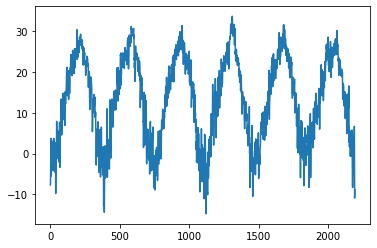

In [189]:
# 평균 기온값 추출 및 시각화
temp = dat['평균기온(℃)']

temp.plot()
plt.show()

In [190]:
# 데이터의 집합에서 훈련과 테스트 데이터를 분할
train_x = temp[:1461]
test_x = temp[1461:]

# Numpy 배열로 변환
train_x = np.array(train_x)
test_x = np.array(test_x)

In [191]:
# 설명변수의 수
attr_size = 180  # 6개월

tmp = []
train_X = []

# 데이터 점 1개 단위로 윈도우를 슬라이드시키며 훈련 데이터를 추출
for i in range(0, len(train_x) - attr_size):
  tmp.append(train_x[i:i+attr_size])
train_X = np.array(tmp)

# 훈련데이터를 데이터프레임으로 출력
pd.DataFrame(train_X)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179
0,-7.7,-6.0,-2.7,2.5,3.7,-3.2,-5.5,-5.1,-2.1,-0.3,-0.4,-2.7,0.2,2.5,2.8,0.8,-4.1,-1.3,-0.1,-0.9,2.6,3.1,1.2,3.7,3.0,3.6,-3.6,-4.1,-1.1,-3.3,-4.5,-3.0,-0.6,0.6,0.4,-0.1,0.4,1.2,-9.8,-5.7,...,18.7,20.0,20.6,21.0,20.8,21.5,23.2,24.3,23.8,19.8,22.1,21.7,23.1,23.3,24.2,19.1,22.4,23.4,22.4,22.2,25.3,24.6,23.6,24.7,22.8,24.2,25.0,23.4,24.8,24.5,19.6,22.4,24.0,24.7,25.7,24.8,21.0,25.2,25.4,25.7
1,-6.0,-2.7,2.5,3.7,-3.2,-5.5,-5.1,-2.1,-0.3,-0.4,-2.7,0.2,2.5,2.8,0.8,-4.1,-1.3,-0.1,-0.9,2.6,3.1,1.2,3.7,3.0,3.6,-3.6,-4.1,-1.1,-3.3,-4.5,-3.0,-0.6,0.6,0.4,-0.1,0.4,1.2,-9.8,-5.7,1.7,...,20.0,20.6,21.0,20.8,21.5,23.2,24.3,23.8,19.8,22.1,21.7,23.1,23.3,24.2,19.1,22.4,23.4,22.4,22.2,25.3,24.6,23.6,24.7,22.8,24.2,25.0,23.4,24.8,24.5,19.6,22.4,24.0,24.7,25.7,24.8,21.0,25.2,25.4,25.7,24.4
2,-2.7,2.5,3.7,-3.2,-5.5,-5.1,-2.1,-0.3,-0.4,-2.7,0.2,2.5,2.8,0.8,-4.1,-1.3,-0.1,-0.9,2.6,3.1,1.2,3.7,3.0,3.6,-3.6,-4.1,-1.1,-3.3,-4.5,-3.0,-0.6,0.6,0.4,-0.1,0.4,1.2,-9.8,-5.7,1.7,2.7,...,20.6,21.0,20.8,21.5,23.2,24.3,23.8,19.8,22.1,21.7,23.1,23.3,24.2,19.1,22.4,23.4,22.4,22.2,25.3,24.6,23.6,24.7,22.8,24.2,25.0,23.4,24.8,24.5,19.6,22.4,24.0,24.7,25.7,24.8,21.0,25.2,25.4,25.7,24.4,23.7
3,2.5,3.7,-3.2,-5.5,-5.1,-2.1,-0.3,-0.4,-2.7,0.2,2.5,2.8,0.8,-4.1,-1.3,-0.1,-0.9,2.6,3.1,1.2,3.7,3.0,3.6,-3.6,-4.1,-1.1,-3.3,-4.5,-3.0,-0.6,0.6,0.4,-0.1,0.4,1.2,-9.8,-5.7,1.7,2.7,-2.2,...,21.0,20.8,21.5,23.2,24.3,23.8,19.8,22.1,21.7,23.1,23.3,24.2,19.1,22.4,23.4,22.4,22.2,25.3,24.6,23.6,24.7,22.8,24.2,25.0,23.4,24.8,24.5,19.6,22.4,24.0,24.7,25.7,24.8,21.0,25.2,25.4,25.7,24.4,23.7,23.7
4,3.7,-3.2,-5.5,-5.1,-2.1,-0.3,-0.4,-2.7,0.2,2.5,2.8,0.8,-4.1,-1.3,-0.1,-0.9,2.6,3.1,1.2,3.7,3.0,3.6,-3.6,-4.1,-1.1,-3.3,-4.5,-3.0,-0.6,0.6,0.4,-0.1,0.4,1.2,-9.8,-5.7,1.7,2.7,-2.2,-1.6,...,20.8,21.5,23.2,24.3,23.8,19.8,22.1,21.7,23.1,23.3,24.2,19.1,22.4,23.4,22.4,22.2,25.3,24.6,23.6,24.7,22.8,24.2,25.0,23.4,24.8,24.5,19.6,22.4,24.0,24.7,25.7,24.8,21.0,25.2,25.4,25.7,24.4,23.7,23.7,23.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1276,24.4,21.9,22.6,27.4,27.3,25.3,23.9,23.7,23.3,20.8,23.7,26.8,26.6,27.3,27.9,28.3,28.7,28.1,28.2,28.7,29.5,30.6,31.8,31.7,31.4,30.1,30.1,30.9,29.5,31.3,31.7,32.6,33.6,33.7,33.1,31.1,30.0,30.5,30.5,31.0,...,4.9,6.1,6.5,6.5,5.8,2.3,1.9,2.6,4.8,6.3,7.1,5.0,3.5,2.7,5.5,8.2,11.5,6.7,0.0,2.4,-7.3,-8.3,-7.2,-2.5,0.2,-1.9,-2.2,-4.4,-2.4,0.0,1.6,2.6,4.0,3.4,5.6,6.9,2.4,-2.3,0.6,-1.5
1277,21.9,22.6,27.4,27.3,25.3,23.9,23.7,23.3,20.8,23.7,26.8,26.6,27.3,27.9,28.3,28.7,28.1,28.2,28.7,29.5,30.6,31.8,31.7,31.4,30.1,30.1,30.9,29.5,31.3,31.7,32.6,33.6,33.7,33.1,31.1,30.0,30.5,30.5,31.0,28.8,...,6.1,6.5,6.5,5.8,2.3,1.9,2.6,4.8,6.3,7.1,5.0,3.5,2.7,5.5,8.2,11.5,6.7,0.0,2.4,-7.3,-8.3,-7.2,-2.5,0.2,-1.9,-2.2,-4.4,-2.4,0.0,1.6,2.6,4.0,3.4,5.6,6.9,2.4,-2.3,0.6,-1.5,-10.1
1278,22.6,27.4,27.3,25.3,23.9,23.7,23.3,20.8,23.7,26.8,26.6,27.3,27.9,28.3,28.7,28.1,28.2,28.7,29.5,30.6,31.8,31.7,31.4,30.1,30.1,30.9,29.5,31.3,31.7,32.6,33.6,33.7,33.1,31.1,30.0,30.5,30.5,31.0,28.8,30.7,...,6.5,6.5,5.8,2.3,1.9,2.6,4.8,6.3,7.1,5.0,3.5,2.7,5.5,8.2,11.5,6.7,0.0,2.4,-7.3,-8.3,-7.2,-2.5,0.2,-1.9,-2.2,-4.4,-2.4,0.0,1.6,2.6,4.0,3.4,5.6,6.9,2.4,-2.3,0.6,-1.5,-10.1,-10.5
1279,27.4,27.3,25.3,23.9,23.7,23.3,20.8,23.7,26.8,26.6,27.3,27.9,28.3,28.7,28.1,28.2,28.7,29.5,30.6,31.8,31.7,31.4,30.1,30.1,30.9,29.5,31.3,31.7,32.6,33.6,33.7,33.1,31.1,30.0,30.5,30.5,31.0,28.8,30.7,31.0,...,6.5,5.8,2.3,1.9,2.6,4.8,6.3,7.1,5.0,3.5,2.7,5.5,8.2,11.5,6.7,0.0,2.4,-7.3,-8.3,-7.2,-2.5,0.2,-1.9,

In [192]:
# 신경망 구성
class Net(nn.Module):
  def __init__(self):
    super(Net,self).__init__()
    self.fc1 = nn.Linear(180,128)
    self.fc2 = nn.Linear(128,64)
    self.fc3 = nn.Linear(64,128)
    self.fc4 = nn.Linear(128,180)

  def forward(self,x):
    x = F.relu(self.fc1(x))
    x = self.fc2(x)
    x = F.relu(self.fc3(x))
    x = self.fc4(x)
    return x

# 인스턴스 생성
model = Net()

In [199]:
np.random.randint(0,1281)

109

In [205]:
# 모형 학습

# 오차함수 객체
criterion = nn.MSELoss()

# 최적화 담당
optimizer = optim.SGD(model.parameters(), lr = 0.001)  #경사하강법은 SGD

# 학습시작
for epoch in range(1000):
  total_loss = 0
  d = []

  # 훈련 데이터를 미니배치로 분할
  for i in range(100):
    index = np.random.randint(0,1281)  # 훈련데이터에 인덱스 부여
    d.append(train_X[index])  # 미니배치 분할

  d = np.array(d, dtype='float32')  # Numpy배열로 변황
  d = Variable(torch.from_numpy(d))  # 계산그래프 구성

  optimizer.zero_grad()  # 경사초기화

  output = model(d)  # 순전파 계산

  loss = criterion(output, d)  # 오차 계산
  loss.backward()  # 역전파 계산

  optimizer.step()  #가중치 업데이트

  total_loss += loss.data  # 누적오차 계산
  
  if (epoch+1) % 100 == 0:
    print(epoch+1, float(total_loss))

100 24.038188934326172
200 17.2828369140625
300 16.129114151000977
400 11.512357711791992
500 9.906523704528809
600 13.165488243103027
700 11.84273910522461
800 18.330368041992188
900 9.05148696899414
1000 10.145173072814941


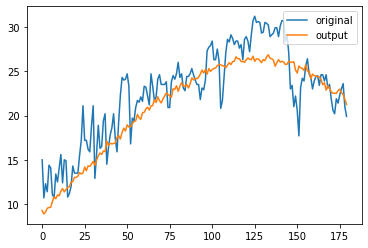

In [206]:
# 입력 데이터 플로팅
plt.plot(d.data[0].numpy(), label='original')
plt.plot(output.data[0].numpy(), label='output')
plt.legend(loc= 'upper right')
plt.show()

이상점수 계산

In [207]:
tmp = []
test_X = []

# 테스트 데이터를 6개월 단위로 분할
tmp.append(test_x[0:180])
tmp.append(test_x[180:360])
tmp.append(test_x[360:540])
tmp.append(test_x[540:720])
test_X = np.array(tmp, dtype='float32')

# 데이터를 데이터프레임으로 전환
pd.DataFrame(test_X)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179
0,-5.000000,-4.9,-3.500000,-1.1,-2.800000,-2.800000,-1.900000,-3.500000,-4.700000,-0.6,2.400000,2.800000,1.2,1.4,-1.7,-5.200000,-0.300000,0.600000,3.6,-1.400000,-1.200000,1.7,2.000000,0.1,-1.2,-2.500000,-0.100000,1.2,-0.200000,1.8,-2.0,-2.100000,1.400000,3.300000,-0.6,2.800000,5.100000,-2.100000,-6.100000,-5.4,...,17.200001,19.500000,22.1,24.200001,23.4,24.5,17.799999,18.1,20.299999,19.6,19.1,18.900000,21.1,23.100000,22.600000,23.0,21.200001,20.000000,21.9,21.6,18.4,20.5,21.5,23.000000,23.0,21.900000,22.000000,21.700001,20.799999,21.4,22.700001,22.1,24.200001,25.000000,25.200001,25.600000,25.5,25.5,24.700001,23.100000
1,23.900000,23.9,24.400000,24.1,25.400000,27.600000,29.700001,26.700001,25.100000,25.0,22.700001,21.900000,23.6,24.9,25.9,23.799999,24.700001,25.600000,26.9,28.600000,28.000000,25.1,26.700001,28.1,26.5,26.299999,25.100000,28.4,26.100000,27.5,28.1,25.799999,26.299999,28.400000,29.4,28.299999,30.500000,31.600000,26.900000,28.9,...,8.300000,4.600000,0.2,0.500000,4.2,9.7,12.100000,9.8,1.900000,6.6,3.1,3.500000,1.5,4.100000,4.600000,-0.1,0.500000,2.000000,-4.4,-5.9,-2.4,-0.9,3.2,8.100000,6.3,-0.700000,2.100000,2.700000,5.300000,7.8,7.700000,0.8,-0.800000,-1.100000,-1.200000,4.100000,3.4,0.8,2.000000,2.000000
2,-1.700000,1.1,3.800000,2.7,-7.900000,-2.200000,1.000000,-0.100000,1.200000,1.3,3.100000,6.300000,2.4,-1.2,-0.6,-0.100000,-1.000000,-2.900000,-2.3,-2.700000,-1.700000,-0.6,0.300000,1.9,0.7,-0.400000,3.000000,4.6,2.800000,4.3,5.5,5.900000,6.800000,6.000000,5.2,3.900000,2.600000,1.500000,-0.400000,-1.6,...,16.100000,16.700001,19.1,19.100000,13.0,14.4,17.400000,18.5,20.100000,17.1,16.6,16.200001,17.4,18.700001,20.700001,22.6,21.200001,19.700001,17.9,22.0,21.9,23.0,24.6,22.700001,25.0,26.700001,25.799999,26.100000,24.700001,26.9,24.000000,23.0,24.400000,24.299999,23.400000,24.700001,24.9,26.1,28.600000,27.299999
3,22.299999,21.6,21.799999,24.1,25.200001,23.799999,20.100000,21.100000,24.200001,25.5,24.200001,23.799999,25.6,24.1,25.5,27.500000,24.500000,25.799999,23.5,18.700001,20.299999,23.4,25.000000,26.0,26.1,24.000000,23.799999,25.0,23.700001,21.1,22.5,24.299999,25.400000,24.299999,24.4,23.700001,25.299999,26.200001,25.299999,24.9,...,9.300000,10.400000,12.2,12.500000,11.1,12.4,15.900000,16.6,13.600000,2.8,6.5,5.600000,1.7,2.900000,4.600000,5.6,4.100000,-0.100000,-0.6,-0.2,1.1,2.4,0.7,-0.600000,2.1,4.500000,3.400000,-0.500000,1.500000,5.8,5.300000,2.3,-1.100000,-7.700000,-8.300000,-8.300000,-4.9,-2.1,-5.100000,-3.700000


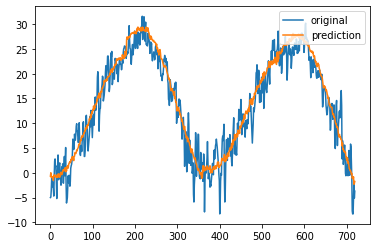

In [209]:
# 모형 적용
d = Variable(torch.from_numpy(test_X))
output = model(d)

# 입력 데이터 플로팅
plt.plot(test_X.flatten(), label='original')
plt.plot(output.data.numpy().flatten(), label='prediction')
plt.legend(loc='upper right')
plt.show()

In [213]:
test_X.flatten().shape

(720,)

In [214]:
test_X.shape

(4, 180)

In [216]:
# 이상 점수 계산
test = test_X.flatten()
pred = output.data.numpy().flatten()

total_score = []
for i in range(0, 720):
  dist = (test[i] - pred[i])
  score = pow(dist, 2)  # 제곱을 의미
  total_score.append(score)

# 이상 점수를 [0,1] 구간으로 정규화
total_score = np.array(total_score)
max_score = np.max(total_score)
total_score = total_score / max_score

# 이상 점수 출력
total_score

array([1.91950994e-01, 2.47750406e-01, 6.65523513e-02, 6.49187691e-04,
       4.30486115e-02, 3.77284069e-02, 1.24135055e-02, 3.89282589e-02,
       1.81253303e-01, 5.48926147e-05, 8.21094911e-02, 1.19269770e-01,
       4.20543573e-02, 4.82931712e-02, 1.41255412e-02, 1.85331900e-01,
       6.49355269e-04, 8.78626213e-03, 2.06211762e-01, 1.43105643e-02,
       1.00240390e-02, 5.73202061e-02, 8.67953786e-02, 3.62068415e-03,
       1.00421632e-02, 7.12933398e-02, 8.87464063e-04, 1.44532522e-02,
       5.84816191e-06, 2.29549952e-02, 6.90221838e-02, 7.38721182e-02,
       1.04925416e-02, 6.92545678e-02, 1.64961807e-02, 3.15757342e-02,
       2.45911575e-01, 1.00349994e-01, 4.32638507e-01, 4.54440847e-01,
       3.75718180e-01, 2.05230727e-01, 2.45316298e-02, 1.38878878e-01,
       6.17107230e-02, 8.30473618e-02, 2.53045940e-01, 1.50942785e-01,
       1.75050860e-02, 1.92305444e-02, 7.32729162e-03, 6.49951669e-03,
       1.46783248e-02, 1.29007752e-01, 1.10435670e-01, 5.17486202e-02,
      

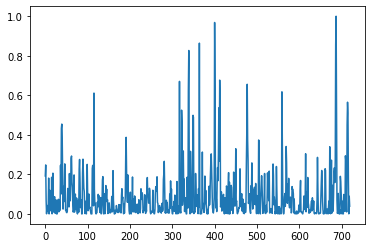

In [217]:
# 이상 점수 플로팅
plt.plot(total_score)
plt.show()